**2. Sonar**
---

In [1]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [2]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify

In [3]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [4]:
# Reading the dataset and creating the dataframe
cancer_diag = loadmat('Datasets.mat/Sonar_208x60_binary.mat')

df = pd.DataFrame(cancer_diag.get('X'))
df['y'] = cancer_diag.get('y').ravel()

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,y
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,1.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,1.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,1.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,2.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,2.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,2.000000


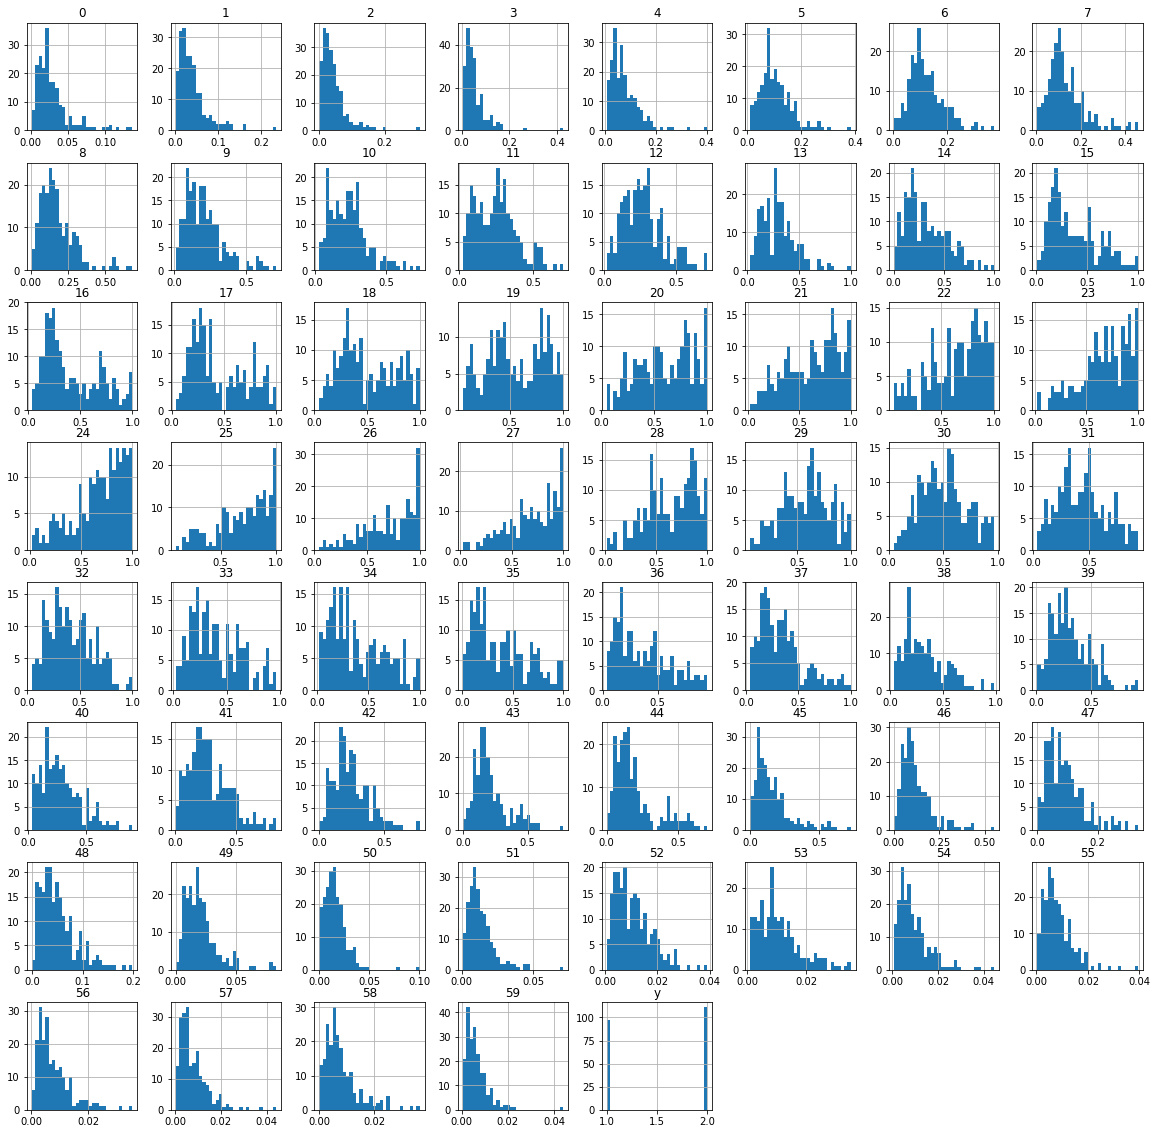

In [8]:
df.hist(bins= 30, figsize=(20,20))
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


ValueError: range parameter must be finite.

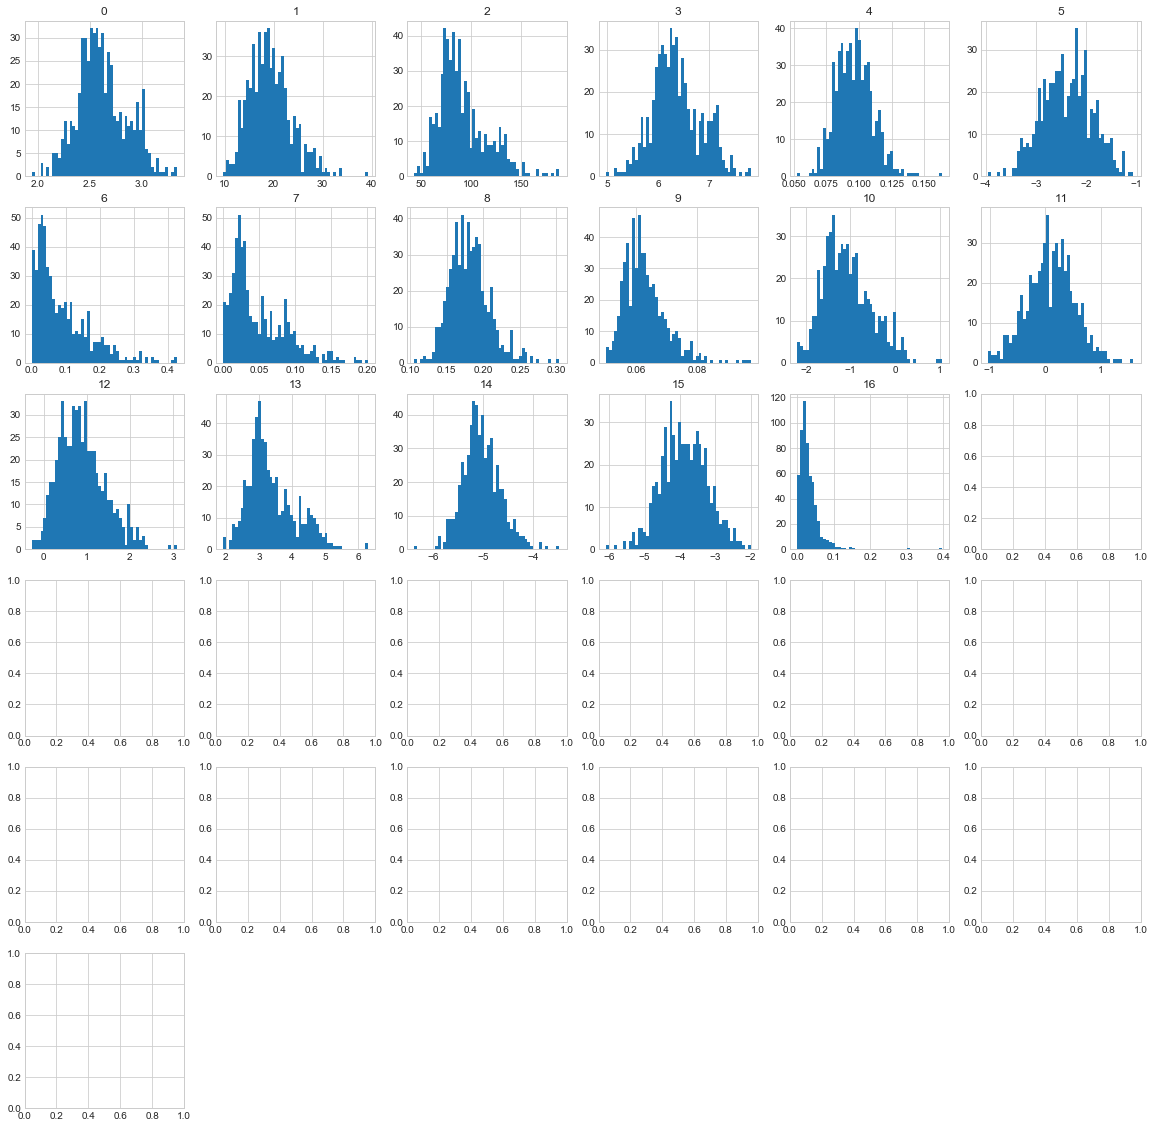

In [54]:
df_new = df.copy()
df_new = df_new.apply(lambda x: np.log(x) if x.name in [0,3,5,10,11,12,13,14,15,17,18,19,20,22,23,25,26] else x)
df_new.hist(bins=50,figsize=(20,20))
plt.show()

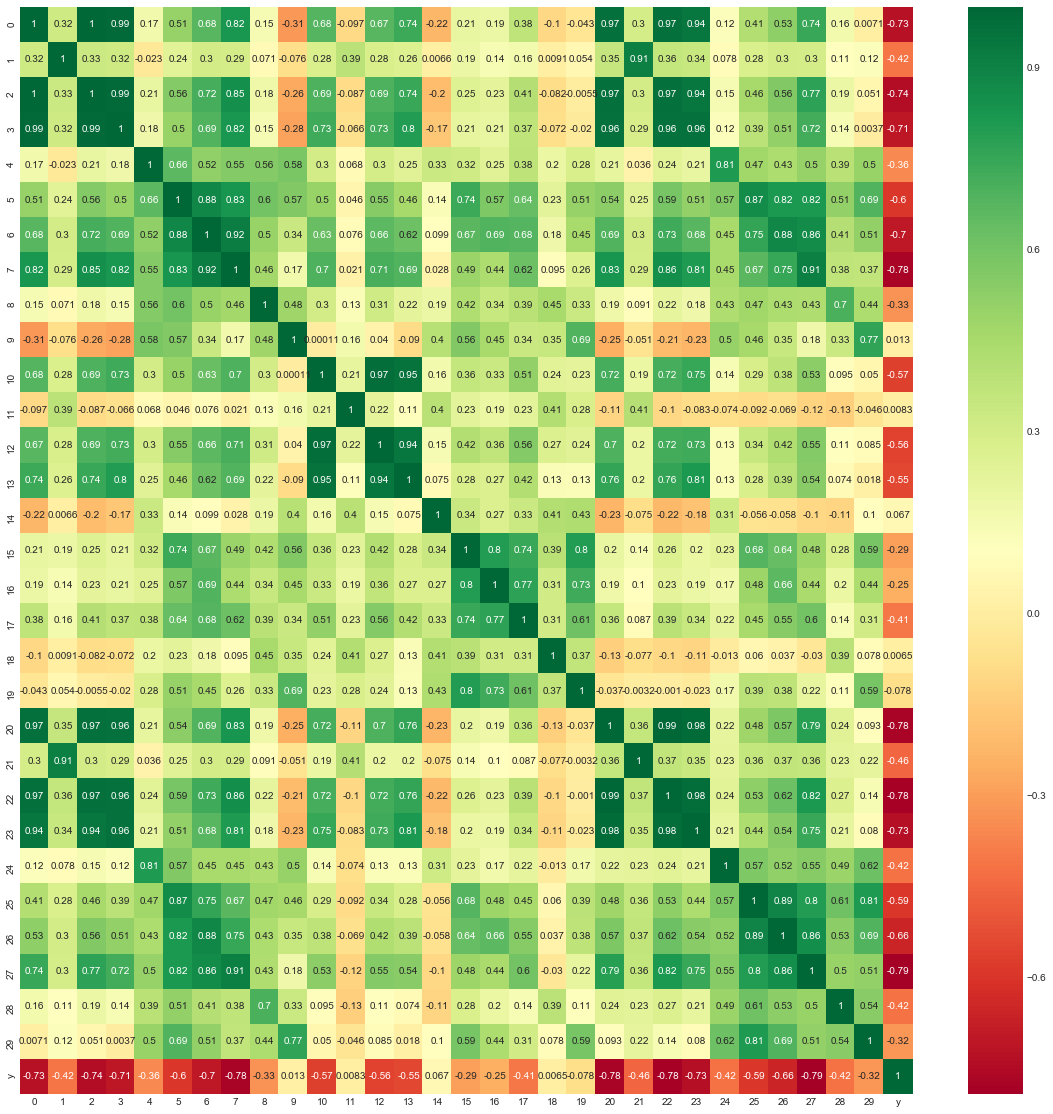

In [25]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [10]:
corrmat = df.corr()
corrmat['y'].sort_values(ascending=False)

y     1.000000
10    0.432855
11    0.392245
48    0.351312
9     0.341142
44    0.339406
47    0.329333
8     0.321448
12    0.312811
45    0.305610
46    0.301697
50    0.293205
51    0.288651
43    0.273779
0     0.271694
3     0.250638
20    0.242755
42    0.234077
1     0.231238
19    0.224115
4     0.222232
21    0.201361
2     0.192195
7     0.189314
57    0.184191
53    0.182687
49    0.180224
13    0.157277
41    0.144147
52    0.141871
        ...   
5     0.132327
58    0.130826
55    0.129341
22    0.127413
6     0.114748
54    0.095639
59    0.090055
27    0.082486
23    0.074041
14    0.057318
38    0.056910
26    0.054997
28    0.036639
25    0.028063
24    0.025306
40    0.020942
17    0.014612
15    0.011581
29    0.004219
56    0.000933
16   -0.003969
39   -0.035928
37   -0.040527
31   -0.055275
32   -0.107184
30   -0.110728
33   -0.172010
36   -0.209055
34   -0.227670
35   -0.269151
Name: y, Length: 61, dtype: float64

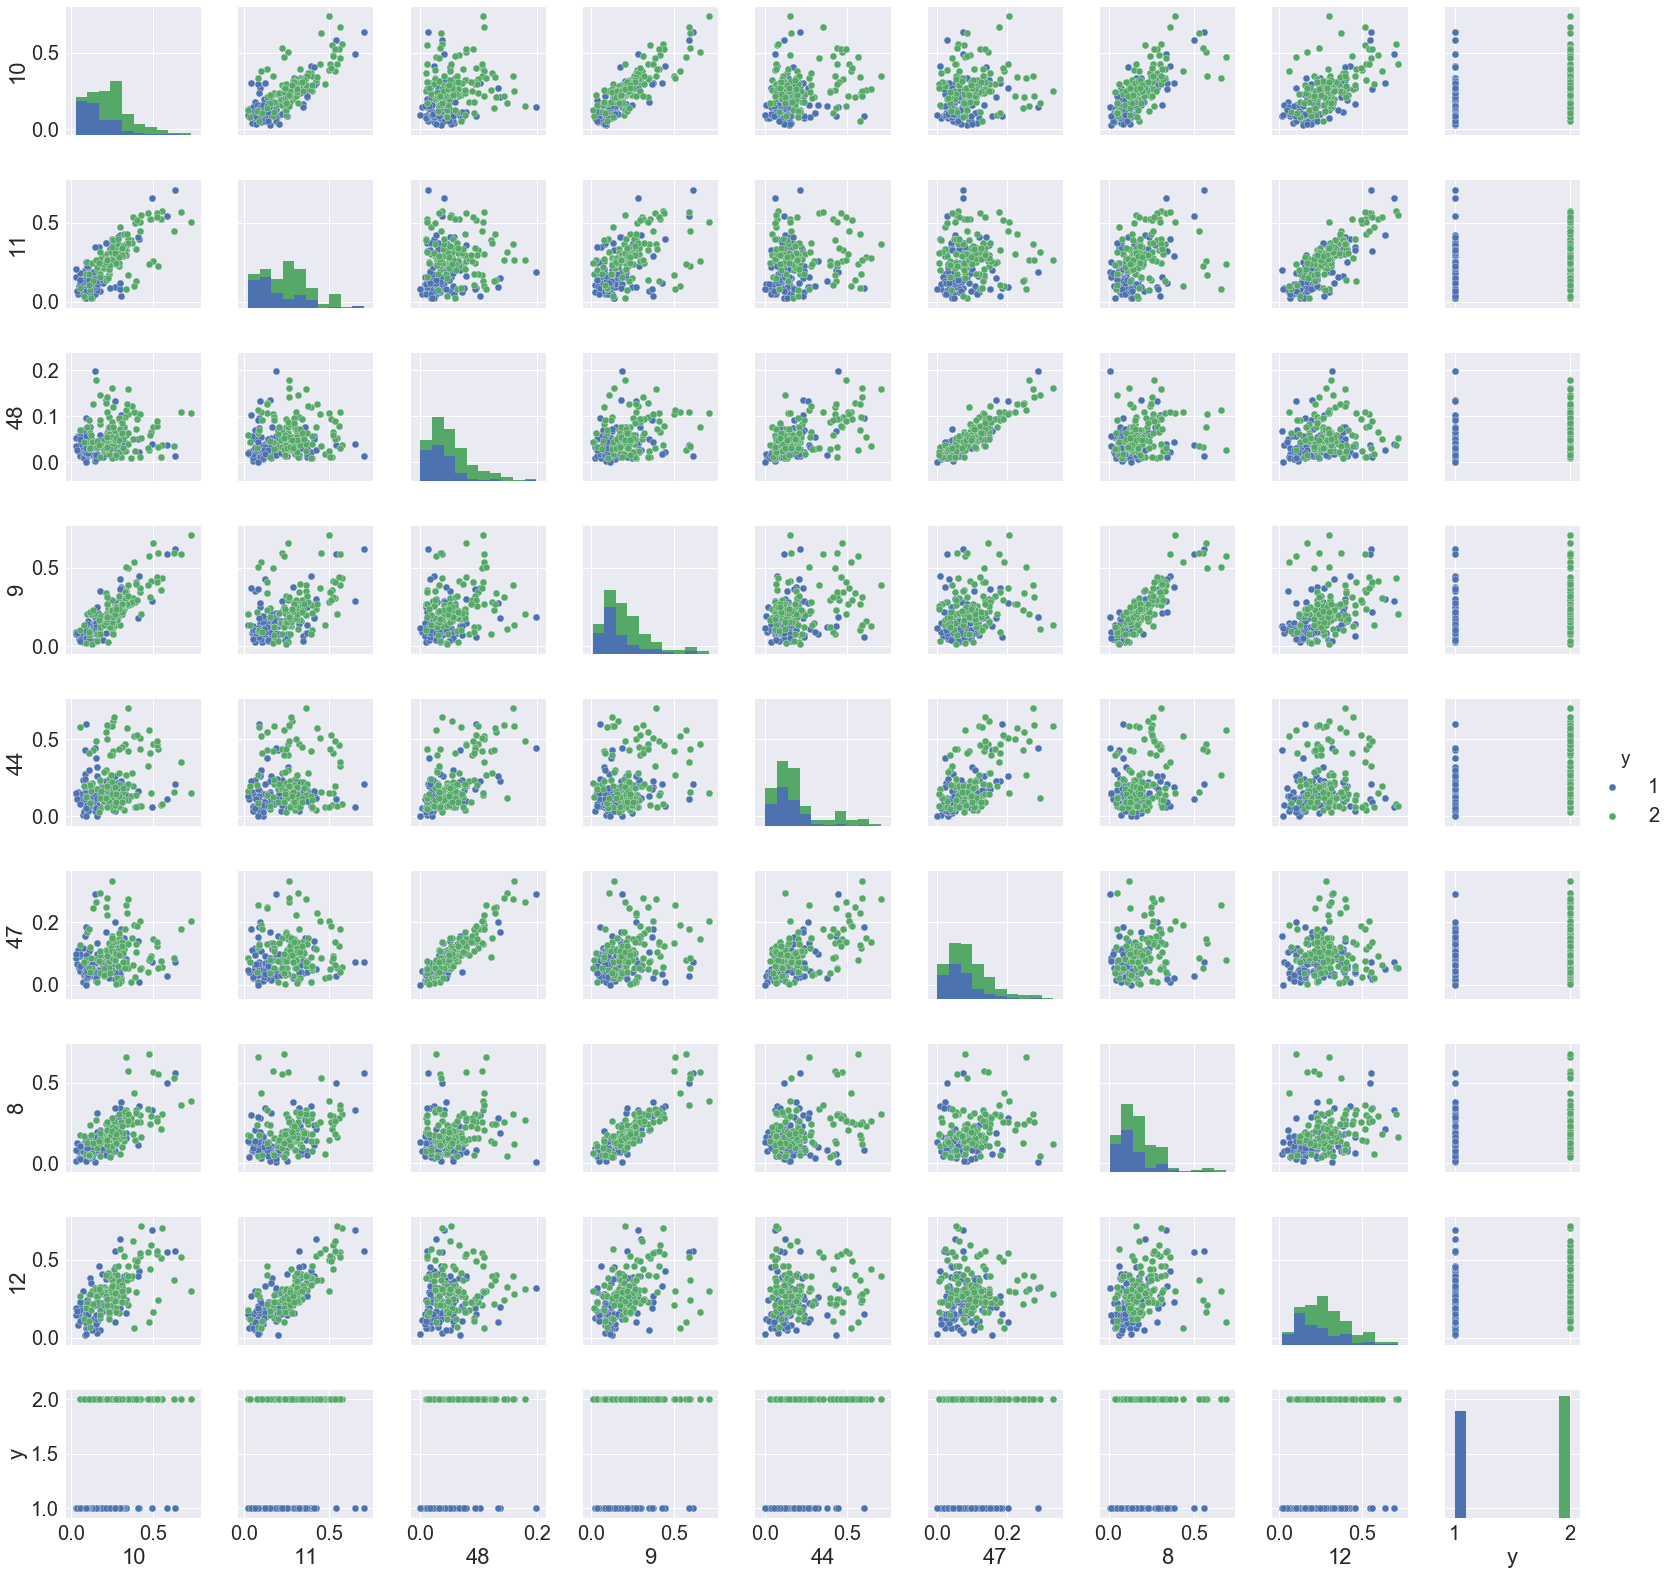

In [11]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df[[10,11, 48,9,44,47,8,12,'y']], hue='y')

In [12]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

2    0.533654
1    0.466346
Name: y, dtype: float64

In [12]:
# sns.set_style('whitegrid')
balance_check = sns.countplot(x='y',data=df,palette='RdBu_r')

NameError: name 'sns' is not defined

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 1:1
- Scaling will be applied

In [14]:
scaler = MinMaxScaler()
sonar_prepared = scaler.fit_transform(df.drop('y',axis=1))
sonar_prepared_df = pd.DataFrame(sonar_prepared)

# 1. Naive Bayes

The model score is 0.604 (+/- 0.211)
The IQR is 0.143 between [0.57,0.71]
There is 0 deleted rows


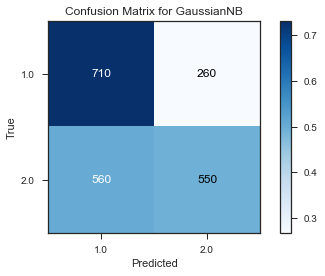

In [19]:
sns.set(font_scale=1)
sns.set_style('ticks')
conf, test_scores = classify(df.drop('y',axis=1), df['y'],classifiers['Naive Bayes']())

The model score is 0.604 (+/- 0.211)
The IQR is 0.143 between [0.57,0.71]
There is 0 deleted rows


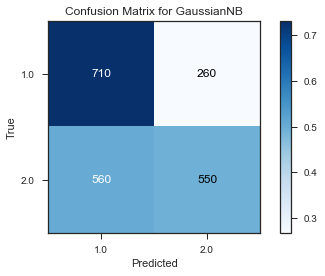

In [20]:
conf, test_scores = classify(sonar_prepared_df, df['y'],classifiers['Naive Bayes']())

# 2. Logistic Regression

The model score is 0.657 (+/- 0.205)
The IQR is 0.310 between [0.50,0.81]
There is 0 deleted rows


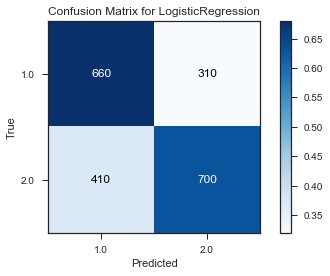

In [22]:
conf, test_scores = classify(df.drop('y',axis=1), df['y'],classifiers['Logistic Regression'](solver='lbfgs'))

The model score is 0.690 (+/- 0.190)
The IQR is 0.376 between [0.52,0.90]
There is 0 deleted rows


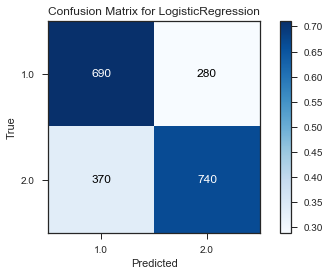

In [23]:
conf, test_scores = classify(sonar_prepared_df, df['y'],classifiers['Logistic Regression'](solver='lbfgs'))

# 3. Ensemble - Random Forests

The model score is 0.717 (+/- 0.138)
The IQR is 0.129 between [0.64,0.77]
There is 0 deleted rows


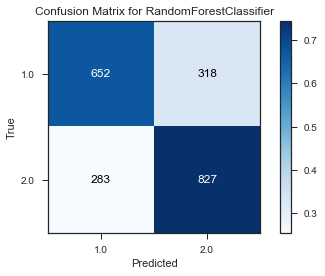

In [24]:
conf, test_scores = classify(df.drop('y',axis=1), df['y'],classifiers['RF'](n_estimators = 100))

The model score is 0.711 (+/- 0.122)
The IQR is 0.143 between [0.62,0.76]
There is 0 deleted rows


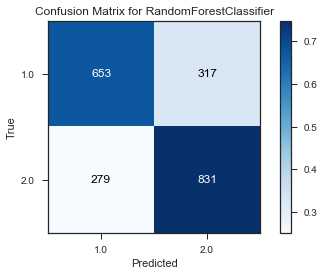

In [25]:
conf, test_scores = classify(sonar_prepared_df, df['y'],classifiers['RF'](n_estimators=100))

# 4. Ensemble - AdaBoost

The model score is 0.699 (+/- 0.162)
The IQR is 0.190 between [0.57,0.76]
There is 0 deleted rows


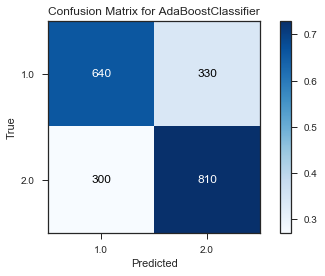

In [26]:
conf, test_scores = classify(df.drop('y',axis=1), df['y'],classifiers['AdaBoost'](n_estimators=100))

# 5. K-Nearest Neighbours

The model score is 0.600 (+/- 0.163)
The IQR is 0.200 between [0.50,0.70]
There is 0 deleted rows


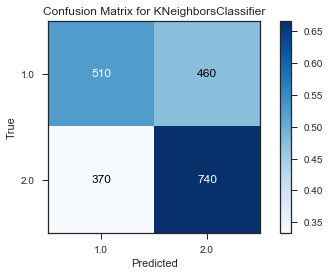

In [30]:
conf, test_scores = classify(df.drop('y',axis=1), df['y'],classifiers['KNN'](5))

The model score is 0.605 (+/- 0.144)
The IQR is 0.095 between [0.57,0.67]
There is 0 deleted rows


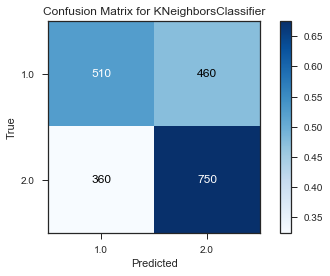

In [33]:
conf, test_scores = classify(sonar_prepared_df, df['y'],classifiers['KNN'](5))

# 6. Support Vector Machines - Linear Kernel

The model score is 0.653 (+/- 0.198)
The IQR is 0.190 between [0.57,0.76]
There is 0 deleted rows


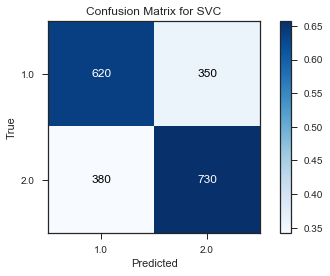

In [34]:
conf, test_scores = classify(df.drop('y',axis=1), df['y'],classifiers['SVM'](kernel='linear'))

The model score is 0.652 (+/- 0.159)
The IQR is 0.190 between [0.52,0.71]
There is 0 deleted rows


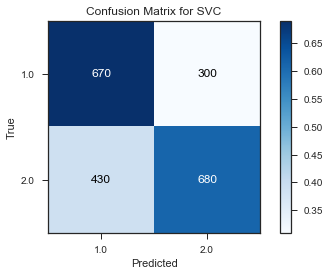

In [35]:
conf, test_scores = classify(sonar_prepared_df, df['y'],classifiers['SVM'](kernel='linear'))

In [37]:
param_grid = [
    {'C':2.**np.linspace(-2,15,18),'gamma':2.**np.linspace(-2,15,18)}
]

clf = SVC(kernel='linear')
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(sonar_prepared_df, df['y'])

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([2.5000e-01, 5.0000e-01,...
       2.5600e+02, 5.1200e+02, 1.0240e+03, 2.0480e+03, 4.0960e+03,
       8.1920e+03, 1.6384e+04, 3.2768e+04]),
                          'gamma': array([2.5000e-01, 5.0000e-01, 1.0000e+00, 2.0000e+00, 4.0000e+00,
       8.0000e+00, 1.6000e+01, 3.2000e+01, 6.4000e+01, 1.2800e+02,
       2.5600e+02, 5.1200e+02, 1.0240e+03, 2.0480e+03, 4.0960e+03,
       8.1920e+03, 1.6384e+04, 3.2768e+04])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

The model score is 0.642 (+/- 0.154)
The IQR is 0.286 between [0.48,0.76]
There is 0 deleted rows


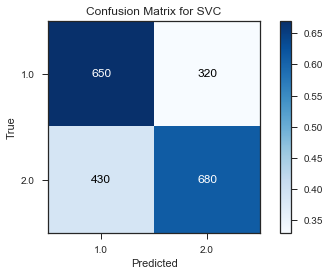

In [38]:
conf, test_scores = classify(sonar_prepared_df, df['y'],classifiers['SVM'](kernel='linear', C=grid_search.best_params_['C'],
                                                                        gamma = grid_search.best_params_['gamma']))

In [39]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

1.0 {'C': 0.25, 'gamma': 0.25}
1.0 {'C': 0.25, 'gamma': 0.5}
1.0 {'C': 0.25, 'gamma': 1.0}
1.0 {'C': 0.25, 'gamma': 2.0}
1.0 {'C': 0.25, 'gamma': 4.0}
1.0 {'C': 0.25, 'gamma': 8.0}
1.0 {'C': 0.25, 'gamma': 16.0}
1.0 {'C': 0.25, 'gamma': 32.0}
1.0 {'C': 0.25, 'gamma': 64.0}
1.0 {'C': 0.25, 'gamma': 128.0}
1.0 {'C': 0.25, 'gamma': 256.0}
1.0 {'C': 0.25, 'gamma': 512.0}
1.0 {'C': 0.25, 'gamma': 1024.0}
1.0 {'C': 0.25, 'gamma': 2048.0}
1.0 {'C': 0.25, 'gamma': 4096.0}
1.0 {'C': 0.25, 'gamma': 8192.0}
1.0 {'C': 0.25, 'gamma': 16384.0}
1.0 {'C': 0.25, 'gamma': 32768.0}
1.0 {'C': 0.5, 'gamma': 0.25}
1.0 {'C': 0.5, 'gamma': 0.5}
1.0 {'C': 0.5, 'gamma': 1.0}
1.0 {'C': 0.5, 'gamma': 2.0}
1.0 {'C': 0.5, 'gamma': 4.0}
1.0 {'C': 0.5, 'gamma': 8.0}
1.0 {'C': 0.5, 'gamma': 16.0}
1.0 {'C': 0.5, 'gamma': 32.0}
1.0 {'C': 0.5, 'gamma': 64.0}
1.0 {'C': 0.5, 'gamma': 128.0}
1.0 {'C': 0.5, 'gamma': 256.0}
1.0 {'C': 0.5, 'gamma': 512.0}
1.0 {'C': 0.5, 'gamma': 1024.0}
1.0 {'C': 0.5, 'gamma': 2048.0}
1.0 {'C'

# 7. Support Vector Machines - RBF Kernel

The model score is 0.651 (+/- 0.143)
The IQR is 0.190 between [0.57,0.76]
There is 0 deleted rows


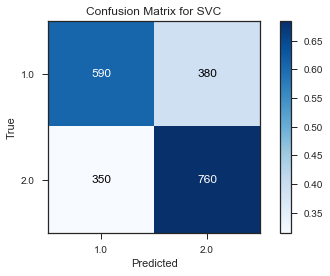

In [43]:
conf, test_scores = classify(df.drop('y',axis=1), df['y'],classifiers['SVM'](kernel='rbf', gamma='scale'))

The model score is 0.670 (+/- 0.124)
The IQR is 0.143 between [0.57,0.71]
There is 0 deleted rows


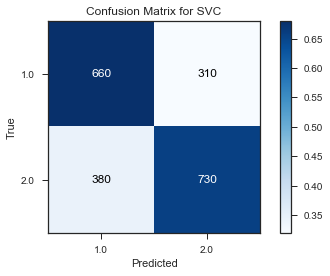

In [44]:
conf, test_scores = classify(sonar_prepared_df, df['y'],classifiers['SVM'](kernel='rbf', gamma='scale'))

In [45]:
param_grid = [
    {'C':2.**np.linspace(-2,15,18),'gamma':2.**np.linspace(-2,15,18)}
]

clf = SVC(kernel='rbf')
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(sonar_prepared_df, df['y'])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': array([2.5000e-01, 5.0000e-01, 1.0...
       2.5600e+02, 5.1200e+02, 1.0240e+03, 2.0480e+03, 4.0960e+03,
       8.1920e+03, 1.6384e+04, 3.2768e+04]),
                          'gamma': array([2.5000e-01, 5.0000e-01, 1.0000e+00, 2.0000e+00, 4.0000e+00,
       8.0000e+00, 1.6000e+01, 3.2000e+01, 6.4000e+01, 1.2800e+02,
       2.5600e+02, 5.1200e+02, 1.0240e+03, 2.0480e+03, 4.0960e+03,
       8.1920e+03, 1.6384e+04, 3.2768e+04])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       

The model score is 0.644 (+/- 0.159)
The IQR is 0.095 between [0.62,0.71]
There is 0 deleted rows


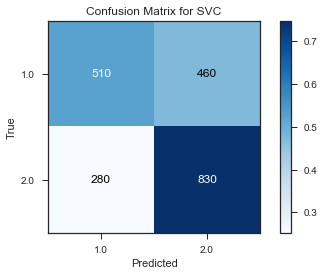

In [46]:
conf, test_scores = classify(sonar_prepared_df, df['y'],classifiers['SVM'](kernel='rbf', C=grid_search.best_params_['C'],
                                                                        gamma = grid_search.best_params_['gamma']))

In [47]:
grid_search.best_params_

{'C': 0.25, 'gamma': 0.25}